In this analysis, we will try to identify genes that determine survival among ovarian cancer patients.

We will use a dataset for 4,728 adult women.

We will model the influence of genes with Cox model.

For this, we will use the functions available in the lifelines library in Python.

The Cox model is expressed by the hazard function denoted by h(t). Briefly, the hazard function can be interpreted as the risk of dying at time t. It can be estimated as follow:

\begin{equation} h(t)= h_0(t)×e^{(b_1 x_1 + b_2 x_2+...+b_n x_n)} \end{equation}

where:

 - $t$ represents the survival time;

 - $h(t)$ is the hazard function determined by a set of p covariates $(x_1,x_2,...,x_n)$ ;

 - the coefficients $(b_1,b_2,...,b_p)$ measure the impact (i.e., the effect size) of covariates;

 - the term $h_0$ is called the baseline hazard. It corresponds to the value of the hazard if all the $x_i$
 are equal to zero $($e^0 = 1$)$. 
 
The $t$ in $h(t)$ reminds us that the hazard may vary over time.

In the following analysis, we will find what are these coefficients, if we look at Ovarian cancer survival, and consider a set of 100 genes.

For these calculations, we will use the lifelines library in python.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from lifelines.plotting import plot_lifetimes      # Lifeline package for the Survival Analysis

In [3]:
##  read the data into a dataframe
df = pd.read_csv("data_problem_B.csv")

In this dataset, an individual's status is 1 if she had died at the observation time, and 0 if she's still alive.

In [4]:
## Have a first look at the data in this file
df.head()

,GENE1,GENE2,GENE3,GENE4,GENE5,GENE6,GENE7,GENE8,GENE9,GENE10,...,GENE93,GENE94,GENE95,GENE96,GENE97,GENE98,GENE99,GENE100,Status,Time(yr)
0,0.224,-0.286,-1.440,0.645,0.951,-0.245,-1.540,0.238,-1.593,0.365,...,0.941,-0.854,0.323,-0.248,-0.442,-0.390,-1.365,1.118,1,0.158
1,1.279,0.862,-1.919,0.008,-0.059,-0.805,-0.454,0.389,-0.771,1.791,...,-0.394,-0.620,-0.885,-0.927,-1.102,-2.229,-0.257,-2.519,1,0.081
2,0.034,-0.914,1.467,-0.692,1.088,-0.215,0.133,-0.179,-1.618,-0.641,...,0.382,1.177,0.144,0.027,1.168,0.640,-0.318,0.129,1,0.556
3,2.016,-0.688,1.575,0.266,0.743,-1.603,-0.485,1.223,0.021,-0.317,...,-1.132,-1.973,0.581,-0.055,-1.720,0.438,-0.186,1.972,1,0.008
4,0.333,0.389,0.286,0.430,-1.077,2.343,0.577,2.273,0.371,-1.311,...,-0.151,0.938,-0.213,-1.188,-0.907,-1.520,-0.654,-0.681,1,0.000


In [5]:
## Data Types and Missing Values in Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2728 entries, 0 to 2727
Columns: 102 entries, GENE1 to Time(yr)
dtypes: float64(101), int64(1)
memory usage: 2.1 MB


In [6]:
# let's see what data are we working with

df.describe(include = 'all')

,GENE1,GENE2,GENE3,GENE4,GENE5,GENE6,GENE7,GENE8,GENE9,GENE10,...,GENE93,GENE94,GENE95,GENE96,GENE97,GENE98,GENE99,GENE100,Status,Time(yr)
count,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,...,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000
mean,0.001427,-0.046250,0.008392,-0.044889,-0.028257,-0.003288,-0.003801,0.014646,-0.024116,-0.012711,...,0.019221,-0.024456,-0.019871,-0.004640,0.013887,0.001162,0.011058,0.012235,0.887830,1.061227
std,0.991062,0.991534,1.008302,1.011029,0.995503,1.005917,1.007718,0.992464,1.005596,0.982257,...,0.994666,1.007468,1.016430,1.015794,1.024044,0.978438,1.018934,1.008216,0.315633,3.054735
min,-3.341000,-3.429000,-3.074000,-3.759000,-3.856000,-3.655000,-4.806000,-3.487000,-3.826000,-3.358000,...,-3.439000,-3.250000,-3.719000,-4.164000,-3.531000,-3.216000,-3.557000,-3.879000,0.000000,0.000000
25%,-0.657750,-0.726000,-0.694250,-0.733250,-0.691250,-0.685250,-0.685250,-0.658250,-0.689000,-0.673000,...,-0.653250,-0.707500,-0.712000,-0.716250,-0.661750,-0.655000,-0.679000,-0.675000,1.000000,0.007000
50%,0.010000,-0.070000,0.020500,-0.063500,-0.026000,-0.000500,-0.012500,0.006500,-0.030500,-0.024000,...,0.028000,-0.024500,-0.027500,0.009500,0.000000,0.015500,0.002500,0.012000,1.000000,0.062000
75%,0.678250,0.641250,0.698000,0.659500,0.653500,0.641250,0.678000,0.676500,0.620250,0.654250,...,0.697250,0.637250,0.688000,0.713000,0.703000,0.680250,0.703000,0.685000,1.000000,0.516000
max,3.382000,3.240000,3.817000,3.724000,3.764000,4.152000,3.399000,4.098000,3.910000,3.147000,...,2.993000,3.631000,3.542000,3.370000,3.591000,3.270000,4.313000,3.406000,1.000000,51.010000


We are lucky and we have no missing data.

There also are no visible outliers:
It does seem a little unusual to me that we have survival data about someone 50 years later,
but it could happen, in an advanced, digitalized healthcare system.

In [7]:
from lifelines import CoxPHFitter

In [8]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
## We fit the Cox Proportional Hazards model to our dataset of genes with ovarian cancer patients,
## and see which genes turn out to be significantly impacting the patient status.
cph.fit(df, 'Time(yr)', event_col='Status')
cph.print_summary()    ## Have a look at the significance of the features

We can also plot our results:

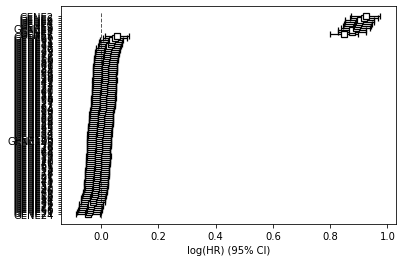

In [9]:
cph.plot()

We see that there are only 10 genes whose lower and upper 95% of Confidence Interval is close to $e$, and whose p-value is less than 0.005: it is the first 10 genes.

Below is another plot for only these top 10 genes.

In [10]:
df_2 = df[['GENE1', 'GENE2', 'GENE3', 'GENE4', 'GENE5', 'GENE6', 'GENE7', 'GENE8', 'GENE9', 'GENE10','Time(yr)', 'Status' ]]
cph2 = CoxPHFitter()   ## Instantiate the class to create a cph object
cph2.fit(df_2, 'Time(yr)', event_col='Status')

<lifelines.CoxPHFitter: fitted with 2728 total observations, 306 right-censored observations>

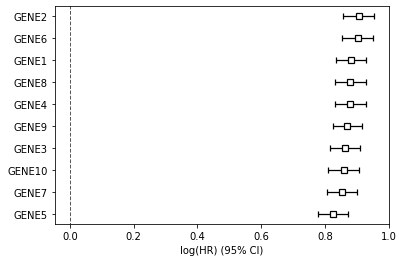

In [11]:
cph2.plot()

As we can see from these results, it is the first 10 genes that determine survival of patients.
In particular, gene 2, 6, 1, 8 and 4 are very important.